# GPU Compute Cost

This notebook was used to deterimine what type of GPU system to use for training and testing some deep learning models I'm working on. The costs are accurate as of 20171101. Here are my notes from Googleing:


* AWS (dollars per hour)
    * P2 - Tesla K80
        * XL - 0.9
        * 8XL - 7.2
        * 16XL - 14.4
    * P3 - Tesla V100
        * 2XL - 3.06
        * 8XL - 12.24
        * 16XL - 24.48
* GCP (dollars per hour)
    * Tesla P100
        * 1 gpu - 2.30
        * 2 gpu - 4.60
        * 4 gpu - 9.2
    * Tesla K80
        * 1 - .7
        * 2 - 1.4
        * 4 - 2.8
        * 8 - 5.6
* NVIDIA DGX
    * Station
        * 4x Tesla V100s
        * Max Power req - 1500W
        * 69k dollars + support plan (15k dollars per year estimated from google search)
    * DGX-1
        * 8x Tesla v100s
        * Max power req - 3200W
        * 150k dollars + support plan (30k dollars per year estimated from google search)
* Home built GPU workstation
    * Deeplearning 11
        * 16,500 bucks
        * 10x NVIDIA GTX 1080Ti
        * Average Power req - 3000W
        * “We are spending around 1k bucks per month on power”
        * GTX 1080Ti compute capability 6.1, P100 = 6.0 ??? wow
        * Comparable to p2.16xlarge

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hours = 25000

p2_xl = np.zeros(hours)
p2_8xl = np.zeros(hours)
p2_16xl = np.zeros(hours)

p3_2xl = np.zeros(hours)
p3_8xl = np.zeros(hours)
p3_16xl = np.zeros(hours)

gcp_p100_1 = np.zeros(hours)
gcp_p100_2 = np.zeros(hours)
gcp_p100_4 = np.zeros(hours)

gcp_k80_1 = np.zeros(hours)
gcp_k80_2 = np.zeros(hours)
gcp_k80_4 = np.zeros(hours)
gcp_k80_8 = np.zeros(hours)

for i in range(hours):
    p2_xl[i] = i * .9
    p2_8xl[i] = i * 7.2
    p2_16xl[i] = i * 14.4

    p3_2xl[i] = i * 3.06
    p3_8xl[i] = i * 12.24
    p3_16xl[i] = i * 24.48

    gcp_p100_1[i] = i * 2.3
    gcp_p100_2[i] = i * 4.6
    gcp_p100_4[i] = i * 9.2

    gcp_k80_1[i] = i * .7
    gcp_k80_2[i] = i * 1.4
    gcp_k80_4[i] = i * 2.8
    gcp_k80_8[i] = i * 5.6

Power price found on [Austin Energy](http://austinenergy.com/wps/portal/ae/residential/rates/residential-electric-rates-and-line-items/!ut/p/a1/jZCxTsMwEEC_pUNGx66j0sAWDAqhLZlIgxdk0mtiybEj-0okvp5ULIBa6G0nvac7PSppTaVV77pVqJ1V5rjLq1fGU_4gGC_yJU9Zlovb1aJ6ms_XbAJevgPlfXnHiqqssnIlWC6SC_0zk7H__McLDnC_EZuWykFhR7TdO1p7CHoHFrUyBAw06HVDvEIIRNkdMdoC0Qh9OPqZfUvSyfewBw8-PvgpTIc4hJuIRWwcx7h1rjUQN66P2CmlcwFp_ZOkWyr_-p4ni9_AibxfwPl-Q_9cf6xhm-J1obPZ7BPxDgh_/dl5/d5/L2dBISEvZ0FBIS9nQSEh/)'s website. I used the highest tier of residential pricing (about 11 cents per kWh).

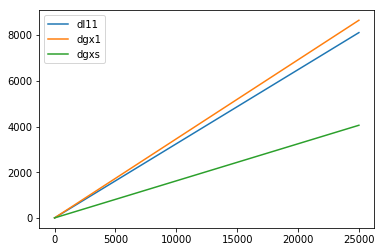

In [15]:
dl11_kw = 3
dgx1_kw = 3.2
dgxs_kw = 1.5

atx_pwr_price = .10814

dl11_pwr_cost = np.zeros(hours)
dgx1_pwr_cost = np.zeros(hours)
dgxs_pwr_cost = np.zeros(hours)

for i in range(hours):
    dl11_pwr_cost[i] = dl11_kw * i * atx_pwr_price
    dgx1_pwr_cost[i] = dgx1_kw * i * atx_pwr_price
    dgxs_pwr_cost[i] = dgxs_kw * i * atx_pwr_price
    
    
plt.plot(dl11_pwr_cost, label='dl11')
plt.plot(dgx1_pwr_cost, label='dgx1')
plt.plot(dgxs_pwr_cost, label='dgxs')

plt.legend()
plt.show()

In [20]:
dgx_station = np.zeros(hours)
dgx_1 = np.zeros(hours)
dgx_1_maint = 30000
dgx_station_maint = 15000

for i in range(hours):
    dgx_station[i] = 69000 - 15000*2 + dgx_station_maint + dgxs_pwr_cost[i]
    dgx_1[i] = 150000 - 30000*2 + dgx_1_maint + dgx1_pwr_cost[i]
    
    if (i % 8760) == 0:
        dgx_1_maint += 30000
        dgx_station_maint += 15000
        
dl11 = np.zeros(hours)

for i in range(hours):
    dl11[i] = 16500 + dl11_pwr_cost[i]

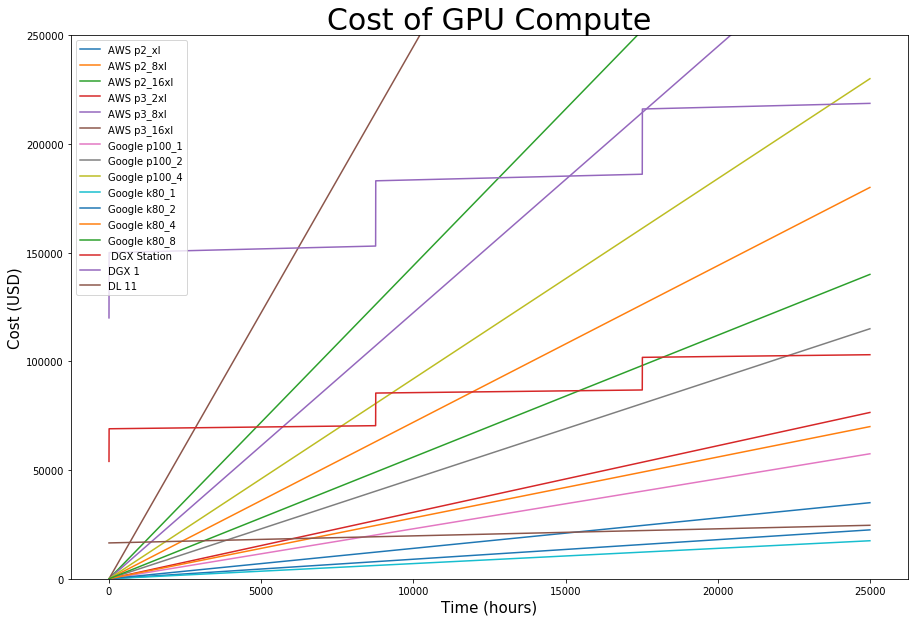

In [37]:
plt.figure(figsize=(15,10))

plt.plot(p2_xl, label='AWS p2_xl')
plt.plot(p2_8xl, label='AWS p2_8xl')
plt.plot(p2_16xl, label='AWS p2_16xl')
plt.plot(p3_2xl, label='AWS p3_2xl')
plt.plot(p3_8xl, label='AWS p3_8xl')
plt.plot(p3_16xl, label='AWS p3_16xl')
plt.plot(gcp_p100_1, label='Google p100_1')
plt.plot(gcp_p100_2, label='Google p100_2')
plt.plot(gcp_p100_4, label='Google p100_4')
plt.plot(gcp_k80_1, label='Google k80_1')
plt.plot(gcp_k80_2, label='Google k80_2')
plt.plot(gcp_k80_4, label='Google k80_4')
plt.plot(gcp_k80_8, label='Google k80_8')

plt.plot(dgx_station, label=' DGX Station')
plt.plot(dgx_1, label='DGX 1')

plt.plot(dl11, label='DL 11')

plt.ylim([0,250000])

plt.title('Cost of GPU Compute', fontsize=30)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Cost (USD)', fontsize=15)
plt.legend()
plt.show()

#plt.savefig('GPU_compute_cost.png', dpi=300)